In [5]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs


In [6]:
n_sims = 1000000
rfr = 0
time = 30
vol = 0.25
S0 = 1

In [7]:
d = (rfr - 0.5 * vol**2)* (time/252)
a = vol*np.sqrt(time/252)
r = np.random.normal(0,1,(n_sims,1))

GBM_returns = S0 * np.exp(d+a*r)

In [8]:
GBM_returns

array([[0.99948464],
       [0.86938909],
       [1.06236014],
       ...,
       [1.01867727],
       [0.88434976],
       [0.97746491]])

In [10]:
pers = [0.01,0.1,1.0,2.5,5.0,10.0]
var = scs.scoreatpercentile(GBM_returns -1 , pers)
var

array([-0.27285914, -0.23607396, -0.18505455, -0.15885919, -0.13556589,
       -0.10797244])

In [11]:
df = pd.DataFrame(var, pers, columns= ['Var'])
df

,Var
0.01,-0.272859
0.10,-0.236074
1.00,-0.185055
2.50,-0.158859
5.00,-0.135566
10.00,-0.107972


KeyError: 'VaR'

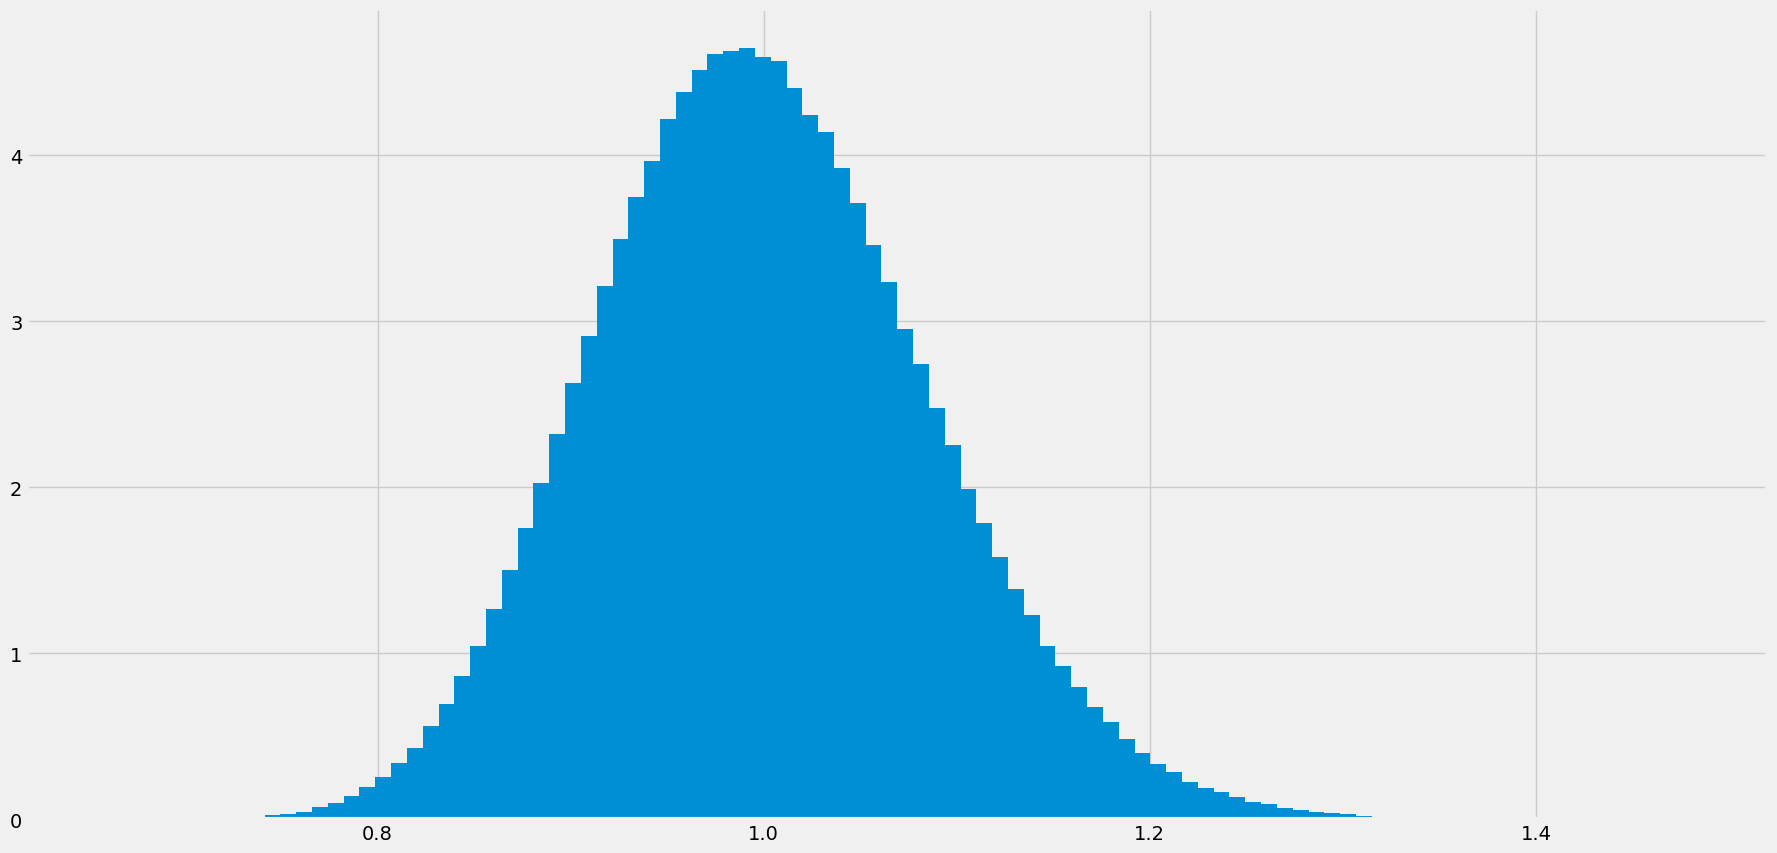

In [15]:
plt.hist(GBM_returns, density= True, bins = 100)
plt.axvline(df.loc[0.01]['VaR'] +1,color = 'r', linestyle='dashed',linewidth =2)
plt.axvline(df.loc[0.1]['VaR'] +1,color = 'g', linestyle='dashed',linewidth =2)
plt.axvline(df.loc[1]['VaR'] +1,color = 'b', linestyle='dashed',linewidth =2)
plt.axvline(df.loc[2.5]['VaR'] +1,color = 'y', linestyle='dashed',linewidth =2)
plt.axvline(df.loc[5]['VaR']+1,color = 'c', linestyle='dashed',linewidth =2)
plt.axvline(df.loc[10]['VaR'] +1,color = 'k', linestyle='dashed',linewidth =2)

plt.ylabel('Frequency')
plt.xlabel('Daily return')
plt.grid(True,linewidth = 0.5)

plt.show()